In [1]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
def get_iris_data():
    """Get the iris data, from local csv or pandas repo."""
    if os.path.exists("iris.csv"):
        print("-- iris.csv found locally")
        df = pd.read_csv("iris.csv", index_col=0)
    else:
        print("-- trying to download from github")
        fn = "https://raw.githubusercontent.com/pydata/pandas/" + \
             "master/pandas/tests/data/iris.csv"
        try:
            df = pd.read_csv(fn)
        except:
            exit("-- Unable to download iris.csv")

        with open("iris.csv", 'w') as f:
            print("-- writing to local iris.csv file")
            df.to_csv(f)

    return df


In [3]:
df = get_iris_data()
print("* df.head()", df.head(), sep="\n", end="\n\n")
print("* df.tail()", df.tail(), sep="\n", end="\n\n")
print("* iris types:", df["Name"].unique(), sep="\n")

-- iris.csv found locally
* df.head()
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

* df.tail()
     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

* iris types:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    print(targets)
    print("aaaa")
    map_to_int = {name: n for n, name in enumerate(targets)}
    print(map_to_int)
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [5]:
df2, targets = encode_target(df, "Name")
print("* df2.head()", df2[["Target", "Name"]].head(),
      sep="\n", end="\n\n")
print("* df2.tail()", df2[["Target", "Name"]].tail(),
      sep="\n", end="\n\n")
print("* targets", targets, sep="\n", end="\n\n")

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
aaaa
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
* df2.head()
   Target         Name
0       0  Iris-setosa
1       0  Iris-setosa
2       0  Iris-setosa
3       0  Iris-setosa
4       0  Iris-setosa

* df2.tail()
     Target            Name
145       2  Iris-virginica
146       2  Iris-virginica
147       2  Iris-virginica
148       2  Iris-virginica
149       2  Iris-virginica

* targets
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



In [6]:
features = list(df2.columns[:4])
print("* features:", features, sep="\n")

* features:
['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


In [7]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [8]:
y = df2["Target"]
X = df2[features]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)
from itertools import product
import matplotlib.pyplot as plt
visualize_tree(dt, features)


# Z = dt.predict(X)







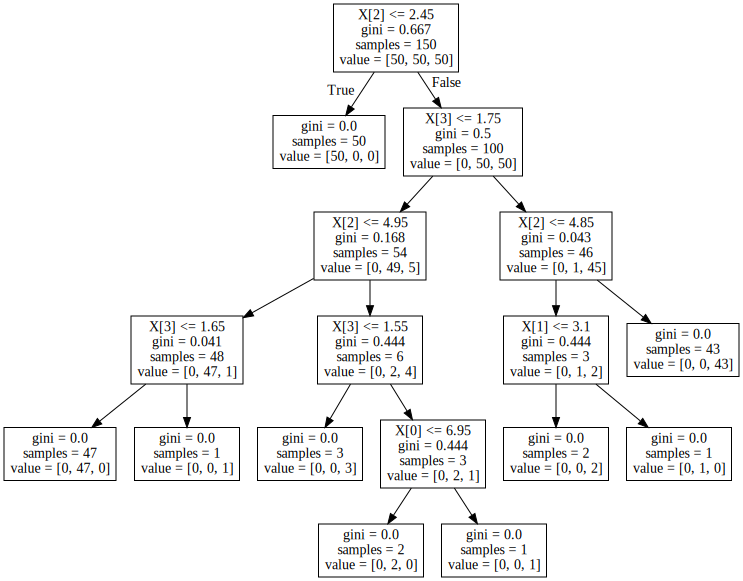

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph 